# Социально-демографический портрет российского фаната киберспорта 

**Описание проекта:** анализ целевой аудитории  для подготовки и запуска образовательных программ в области киберспорта в ряде ВУЗов России. 

**Заказчик:** Национальная Ассоциация Университетского киберспорта 

**Исходные данные:** открытые данные социальной сети "ВКонтакте"

**Формат решения:** портрет пользователя, интересующегося киберспортом и состоящий в сообществе по киберспорту. 


### Оглавление
[1. Социально-демографические характеристики](#id-section1)  
[1.1. Открываем файл с данными и изучаем общую информацию](#id-section1.1.)  
[1.2. Исследовательский анализ](#id-section1.2.)  
- [Семейное положение](#id-section1.2.1.) 
- [Возраст](#id-section1.2.2.)
- [Пол](#id-section1.2.3.) 

[2. Образование и интересы](#id-section2)  
[2.1. Открываем файл с данными и изучаем общую информацию](#id-section2.1.)  
[2.2. Исследовательский анализ](#id-section2.2.)  
- [Образование](#id-section2.2.1.) 
- [Интересы](#id-section2.2.2.)  

[3. Общий вывод](#id-section3)  

### Общие функции для работы 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<div id='id-section1'/>

## Cоциально-демографические характеристики

<div id='id-section1.1.'/>

### 1.1. Открываем файл с данными и изучаем общую информацию

In [6]:
df = pd.read_csv('random.csv', sep = ';', error_bad_lines=False)

In [7]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11129 entries, 0 to 11128
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   VK ID               11129 non-null  int64  
 1   ИМЯ И ФАМИЛИЯ       11129 non-null  object 
 2   ПОЛ                 11129 non-null  object 
 3   СТРАНА              11129 non-null  object 
 4   ГОРОД               11129 non-null  object 
 5   ЛЕТ                 11129 non-null  float64
 6   СЕМЕЙНОЕ ПОЛОЖЕНИЕ  11129 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 608.7+ KB


,VK ID,ИМЯ И ФАМИЛИЯ,ПОЛ,СТРАНА,ГОРОД,ЛЕТ,СЕМЕЙНОЕ ПОЛОЖЕНИЕ
0,154091616,Дензел Вашингтон,М,США,New York City,66.0,женат
1,372128769,Рома Умаров,М,Россия,Пермь,116.0,в активном поиске
2,354743712,Игорь Коган,М,Россия,Инта,19.0,в активном поиске
3,374155535,Баур Мулкоманов,М,Россия,Хабаровск,17.0,всё сложно
4,19145879,Александр Болюк,М,Россия,Москва,27.0,в активном поиске
...,...,...,...,...,...,...,...
11124,345584634,Толя Данилин,М,Россия,Москва,19.0,не женат
11125,10043233,Сергей Кумысов,М,Россия,Красногвардейское,34.0,женат
11126,1388162,Вениамин Морев,М,Россия,Екатеринбург,31.0,не женат
11127,484818813,Cesar Cotiz,М,Колумбия,Bogotá,34.0,женат


В данном файле заполнены все значения. Проверим, чтобы в данных были только профили российских игроков.

In [8]:
print(df.groupby(['СТРАНА'])['VK ID'].count().sort_values())

СТРАНА
Новая Зеландия                           1
Виргинские острова, Великобритания       1
Вьетнам                                  1
Сент-Пьер и Микелон                      1
Гибралтар                                1
                                      ... 
США                                    166
Беларусь                               461
Казахстан                              477
Украина                               1701
Россия                                7564
Name: VK ID, Length: 104, dtype: int64


В выборке оказались игроки других стран.  
Необходимо иссключить их профили из дальнейшего исследования.

In [9]:
df = df[df ['СТРАНА'] == 'Россия']

<div id='id-section1.2.'/>

### 2.2. Исследовательский анализ

<div id='id-section1.2.1.'/>

**Семейное положение**

In [10]:
print(df[df ['СТРАНА'] == 'Россия'].groupby(['СЕМЕЙНОЕ ПОЛОЖЕНИЕ'])['VK ID'].count().sort_values())

СЕМЕЙНОЕ ПОЛОЖЕНИЕ
помолвлена               35
есть друг                93
в гражданском браке     104
помолвлен               112
влюблена                144
не замужем              237
всё сложно              297
замужем                 374
есть подруга            535
влюблён                1013
не женат               1350
женат                  1560
в активном поиске      1710
Name: VK ID, dtype: int64


Игроки используют более 10 различных статусов, определяющих их семейное положение.  
Для удобства объединим близкие по значению статусы в три группы (в отнощениях/женат(замужем)/не женат(не замужем))

In [11]:
df =df[df ['СТРАНА'] == 'Россия'].replace({'СЕМЕЙНОЕ ПОЛОЖЕНИЕ':{'влюблён':'не женат(не замужем)','всё сложно':'не женат(не замужем)','не замужем':'не женат(не замужем)','в активном поиске':'не женат(не замужем)','влюблена':'не женат(не замужем)','не замужем':'не женат(не замужем)','влюблен':'не женат(не замужем)', 'влюблен':'не женат(не замужем)', 'не женат': 'не женат(не замужем)'}})
df =df[df ['СТРАНА'] == 'Россия'].replace({'СЕМЕЙНОЕ ПОЛОЖЕНИЕ':{'помолвлена':'в отношениях','есть друг':'в отношениях','в гражданском браке':'в отношениях','помолвлен':'в отношениях','есть подруга':'в отношениях'}})
df =df[df ['СТРАНА'] == 'Россия'].replace({'СЕМЕЙНОЕ ПОЛОЖЕНИЕ':{'замужем':'женат(замужем)','женат':'женат(замужем)'}})

Теперь посмотрим общую статистику семейного положения игроков

In [12]:
print(df[df ['СТРАНА'] == 'Россия'].groupby(['СЕМЕЙНОЕ ПОЛОЖЕНИЕ'])['VK ID'].count().sort_values())

СЕМЕЙНОЕ ПОЛОЖЕНИЕ
в отношениях             879
женат(замужем)          1934
не женат(не замужем)    4751
Name: VK ID, dtype: int64


<div id='id-section1.2.2.'/>

**Возраст**

In [13]:
df[df ['СТРАНА'] == 'Россия'].ЛЕТ.value_counts().sort_values().tail(10)

17.0    296
25.0    300
31.0    302
24.0    325
18.0    382
23.0    406
19.0    438
22.0    477
20.0    489
21.0    612
Name: ЛЕТ, dtype: int64

<AxesSubplot:>

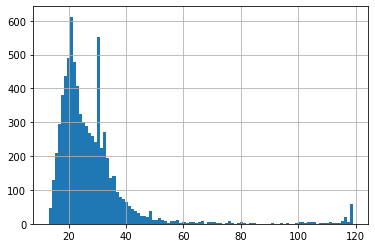

In [14]:
df.ЛЕТ[df ['СТРАНА'] == 'Россия'].hist(bins=100)

Пик интереса к компьютерным играм приходиться на возраст 21 год.  
Для удобства анализа создадим возрастные группы.

In [15]:
df['ЛЕТ'] = df['ЛЕТ'].fillna(0)

In [16]:
def year_filter_2(row):
    if row['ЛЕТ'] == 0:
        return 'не указан'
    elif row['ЛЕТ'] < 10:
        return 'до 10 лет'
    elif row['ЛЕТ'] < 21:
        return '10-20'
    elif row['ЛЕТ'] < 31:
        return '21-30'
    elif row['ЛЕТ'] < 41:
        return '31-40'
    elif row['ЛЕТ'] < 51:
        return '41-50'
    elif row['ЛЕТ'] < 61:
        return '51-60'
    elif row['ЛЕТ'] < 71:
        return '61-70'
    elif row['ЛЕТ'] < 81:
        return '71-80'
    else:
        return 'старше 80 лет'
df['ВОЗРАСТ'] = df.apply(year_filter_2, axis = 1)

In [17]:
df[df['СТРАНА']=='Россия']['ВОЗРАСТ'].value_counts().sort_values(ascending = False)
year_type_2 = df[df['СТРАНА']=='Россия']['ВОЗРАСТ'].value_counts().reset_index()
year_type_2.columns = ['Возраст', 'Количество']
year_type_2['Процент'] = (year_type_2['Количество']/len(df)).round(3)
year_type_2

,Возраст,Количество,Процент
0,21-30,3430,0.453
1,10-20,1990,0.263
2,31-40,1574,0.208
3,41-50,285,0.038
4,старше 80 лет,147,0.019
5,51-60,83,0.011
6,61-70,34,0.004
7,71-80,21,0.003


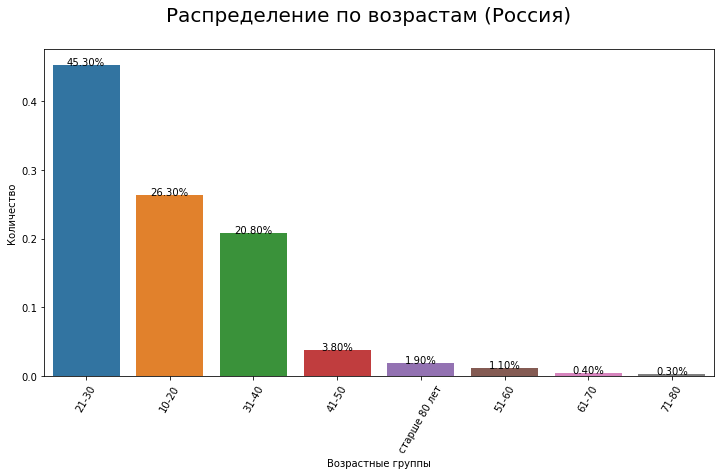

In [18]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=year_type_2, x='Возраст', y='Процент')
plt.suptitle('Распределение по возрастам (Россия)', fontsize=20)
plt.xlabel('Возрастные группы')
plt.ylabel('Количество')
plt.xticks(rotation = 60)
        
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2%}'.format(height),
            ha="center")

Дополнительно распределим пользователей по возрастным группам

In [19]:
def year_filter(row):
    if row['ЛЕТ'] == 0:
        return 'не определен'
    elif row['ЛЕТ'] < 7:
        return 'дети'
    elif row['ЛЕТ'] < 18:
        return 'школьники'
    elif row['ЛЕТ'] < 35:
        return 'молодежь'
    elif row['ЛЕТ'] < 60:
        return 'средний возраст'
    else:
        return 'пенсионеры'
df['ВОЗРАСТНЫЕ ГРУППЫ'] = df.apply(year_filter, axis = 1)

Половина пользователей скрыли свой возраст. Посмотрим процентное соотношение возрастных групп среди указавших дату рождения.

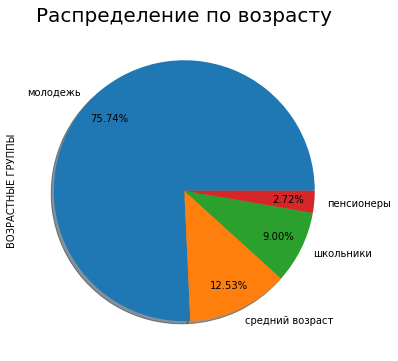

In [20]:
report = df[df['ВОЗРАСТНЫЕ ГРУППЫ'] != 'не определен']
report = report['ВОЗРАСТНЫЕ ГРУППЫ'].value_counts()
report.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Распределение по возрасту', fontsize=20)
plt.show()

In [21]:
year_cat = df['ВОЗРАСТНЫЕ ГРУППЫ'].value_counts().reset_index()
year_cat.columns = ['Возраст', 'Количество']
year_cat['Процент'] = (year_cat['Количество']/len(df)).round(3)
year_cat

,Возраст,Количество,Процент
0,молодежь,5729,0.757
1,средний возраст,948,0.125
2,школьники,681,0.090
3,пенсионеры,206,0.027


<div id='id-section1.2.3.'/>

**Пол**

In [22]:
print(df[df['СТРАНА']=='Россия']['ПОЛ'].value_counts())

М    6419
Ж    1145
Name: ПОЛ, dtype: int64


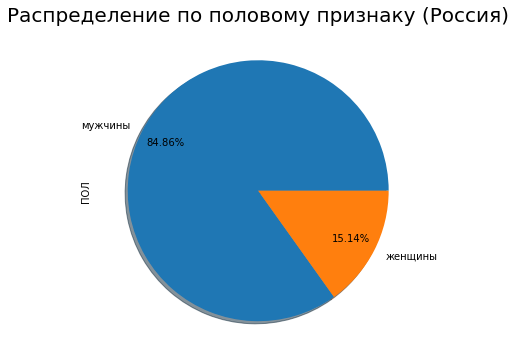

In [23]:
df[df['СТРАНА']=='Россия']['ПОЛ'].value_counts().plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8, labels = ['мужчины','женщины'])
plt.title('Распределение по половому признаку (Россия)', fontsize=20)
plt.show()

<div id='id-section2'/>

## Образование и интересы

<div id='id-section2.1.'/>

### 2.1. Открываем файл с данными и изучаем общую информацию

In [24]:
df_ed = pd.read_csv('random_ed_all_col.csv', sep = ';', error_bad_lines=False)

In [25]:
df_ed.info()
df_ed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ПОЛ                    11618 non-null  object 
 1   СТРАНА                 9237 non-null   object 
 2   ГОРОД                  7961 non-null   object 
 3   ЛЕТ                    5685 non-null   float64
 4   ВУЗ                    2192 non-null   object 
 5   ШКОЛА                  2841 non-null   object 
 6   ДЕЯТЕЛЬНОСТЬ           480 non-null    object 
 7   ИНТЕРЕСЫ               566 non-null    object 
 8   ИГРЫ                   527 non-null    object 
 9   ИСТОЧНИКИ ВДОХНОВЕНИЯ  562 non-null    object 
 10  ГЛАВНОЕ В ЛЮДЯХ        1215 non-null   object 
 11  ГЛАВНОЕ В ЖИЗНИ        1146 non-null   object 
 12  ОТНОШЕНИЕ К КУРЕНИЮ    1208 non-null   object 
 13  ОТНОШЕНИЕ К АЛКОГОЛЮ   681 non-null    object 
 14  VK ID                  10993 non-null  float64
dtypes:

,ПОЛ,СТРАНА,ГОРОД,ЛЕТ,ВУЗ,ШКОЛА,ДЕЯТЕЛЬНОСТЬ,ИНТЕРЕСЫ,ИГРЫ,ИСТОЧНИКИ ВДОХНОВЕНИЯ,ГЛАВНОЕ В ЛЮДЯХ,ГЛАВНОЕ В ЖИЗНИ,ОТНОШЕНИЕ К КУРЕНИЮ,ОТНОШЕНИЕ К АЛКОГОЛЮ,VK ID
0,М,Украина,Львов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,М,Россия,Ангарск,15.0,NaN,Профессиональное училище № 37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,М,Венесуэла,Valencia,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,М,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,М,Россия,Лавела,30.0,АГТУ (бывш. АЛТИ),Школа № 3,Студент АГТУ,NaN,"stalker, ks",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,М,Россия,Владивосток,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428932824.0
11614,М,Россия,Курск,34.0,NaN,Школа № 2,NaN,Интересные,Крестики-нолики на желания =)) кто знает - пой...,NaN,NaN,NaN,NaN,NaN,20506899.0
11615,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576115186.0
11616,М,Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360250835.0


In [26]:
df_ed['СТРАНА'].value_counts()

Россия         6748
Украина        1012
Казахстан       351
Беларусь        320
США             192
               ... 
Южный Судан       1
Либерия           1
Бруней            1
Бахрейн           1
Мексика           1
Name: СТРАНА, Length: 117, dtype: int64

+ Т.к. в файле есть данные по нескольким странам, важно в дальнейшем взять в рассчет только Россию

<div id='id-section2.2.'/>

### 2.2. Исследовательский анализ

<div id='id-section2.2.1.'/>

**Образование**

In [27]:
print('Информация о школах:', df_ed[df_ed['СТРАНА']=='Россия']['ШКОЛА'].value_counts().sum(), 'ВУЗов:', df_ed['ВУЗ'].value_counts().sum())

Информация о школах: 1840 ВУЗов: 2192


In [28]:
df_ed[df_ed['СТРАНА']=='Россия']['ВУЗ'].value_counts()

ТулГУ                                  70
МГУ                                    62
ТГПУ им. Толстого                      28
СПбГУ                                  21
НИУ МЭИ                                13
                                       ..
МГЛИ                                    1
Университет «Дубна» филиал «Угреша»     1
КИЖТ УрГУПС                             1
ЧГМА                                    1
СГА (ТФ)                                1
Name: ВУЗ, Length: 800, dtype: int64

In [29]:
df_ed['ШКОЛА'] = df_ed['ШКОЛА'].fillna('не указан')
df_ed['ВУЗ'] = df_ed['ВУЗ'].fillna('не указан')

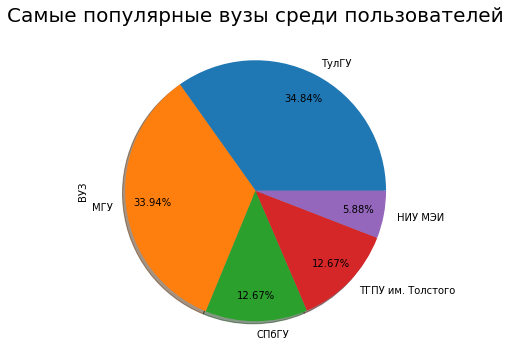

In [30]:
stud_type = df_ed[df_ed['ВУЗ']!='не указан']['ВУЗ'].value_counts()
report2 = stud_type.head(5)
report2.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Самые популярные вузы среди пользователей', fontsize=20)
plt.show()

In [31]:
report3 = df_ed[df_ed['ШКОЛА']!='не указан'].groupby(['ГОРОД']).agg({'ШКОЛА': 'count'}).sort_values(by = 'ШКОЛА', ascending = False).rename(columns={'ШКОЛА': 'Количество учеников'}).reset_index().set_index('ГОРОД')
report3 = report3.head(5)
report3

,Количество учеников
ГОРОД,
Москва,277
Тула,113
Санкт-Петербург,105
Киев,51
Новосибирск,46


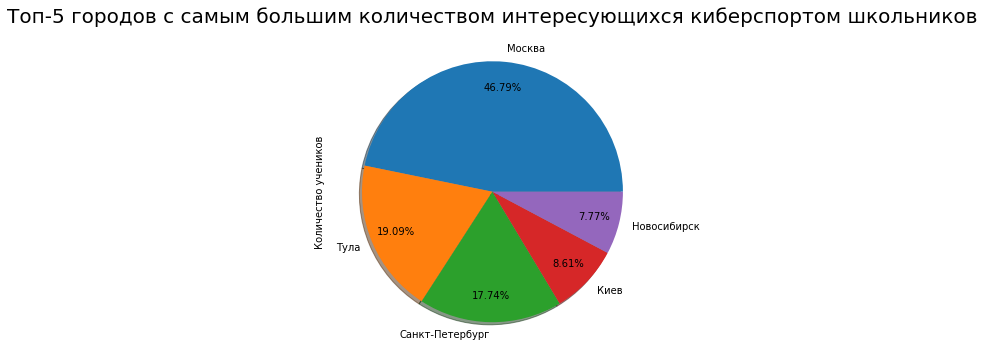

In [32]:
report3['Количество учеников'].plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Топ-5 городов с самым большим количеством интересующихся киберспортом школьников', fontsize=20)
plt.show()

In [33]:
report13 = df_ed[df_ed['СТРАНА']=='Россия']
report13 = report13[report13['ШКОЛА']!='не указан'].groupby(['ГОРОД']).agg({'ШКОЛА': 'count'}).sort_values(by = 'ШКОЛА', ascending = False).rename(columns={'ШКОЛА': 'Количество учеников'}).reset_index().set_index('ГОРОД')
report13 = report13.head(5)
report13

,Количество учеников
ГОРОД,
Москва,276
Тула,113
Санкт-Петербург,105
Новосибирск,46
Екатеринбург,39


In [34]:
def school(row):
    if (row['ВУЗ'].find('чилище') > 0)|(row['ВУЗ'].find('ехникум') > 0)|(row['ВУЗ'].find('олледж') > 0):
        return 'Среднее специальное'
    elif (row['ВУЗ'] != 'не указан' and (row['ЛЕТ']> 23 or row['ЛЕТ'] == 0)):
        return 'Оконченное Высшее'
    elif (row['ВУЗ'] != 'не указан' and row['ЛЕТ']<= 23):
        return 'Неоконченное Высшее'          
    elif (row['ШКОЛА'].find('чилище') > 0)|(row['ШКОЛА'].find('ехникум') > 0)|(row['ШКОЛА'].find('олледж') > 0):
        return 'Среднее специальное'
    elif row['ШКОЛА']!= 'не указан':
        return 'Начальное'
    else:
        return 'не указан'
df_ed['Уровень образования'] = df_ed.apply(school, axis = 1)

In [35]:
df_ed['Уровень образования'].value_counts()

не указан              8041
Начальное              1954
Оконченное Высшее       654
Среднее специальное     501
Неоконченное Высшее     468
Name: Уровень образования, dtype: int64

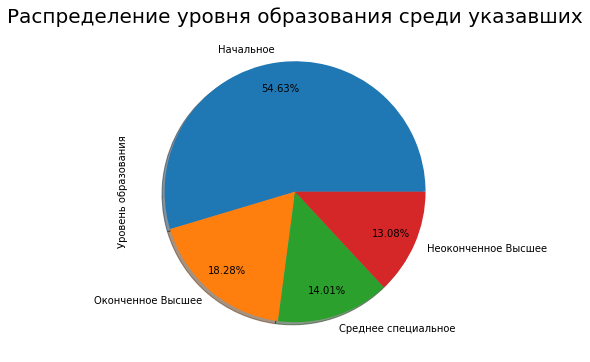

In [36]:
report4 = df_ed[df_ed['Уровень образования']!='не указан']['Уровень образования'].value_counts()
report4.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Распределение уровня образования среди указавших', fontsize=20)
plt.show()

In [37]:
df_ed['Уровень образования'].value_counts()

не указан              8041
Начальное              1954
Оконченное Высшее       654
Среднее специальное     501
Неоконченное Высшее     468
Name: Уровень образования, dtype: int64

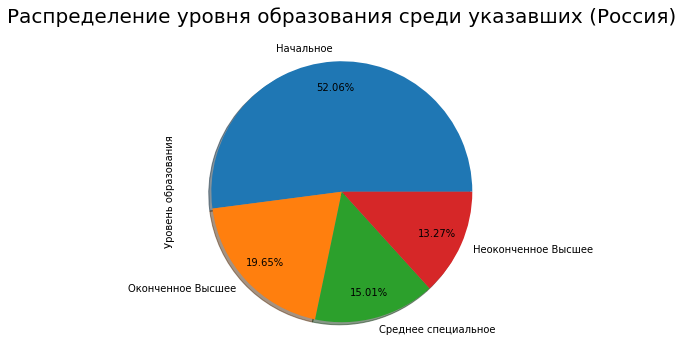

In [38]:
report14 = df_ed[df_ed['СТРАНА']=='Россия']
report14 = report14[report14['Уровень образования']!='не указан']['Уровень образования'].value_counts()
report14.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Распределение уровня образования среди указавших (Россия)', fontsize=20)
plt.show()

<div id='id-section2.2.2.'/>

**Интересы**

In [39]:
df_ed['ОТНОШЕНИЕ К КУРЕНИЮ'].value_counts()

Резко негативное    380
Нейтральное         339
Негативное          310
Компромиссное       106
Положительное        73
Name: ОТНОШЕНИЕ К КУРЕНИЮ, dtype: int64

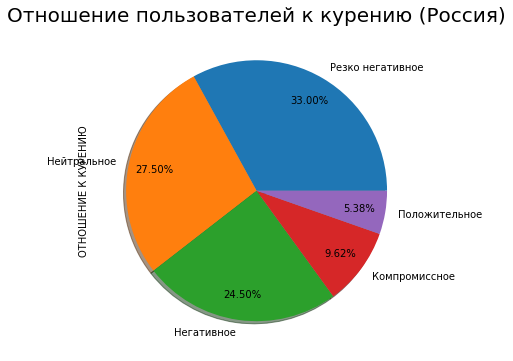

In [40]:
report15 = df_ed[df_ed['СТРАНА']=='Россия']
report15 = report15[report15['ОТНОШЕНИЕ К КУРЕНИЮ']!='не указан']['ОТНОШЕНИЕ К КУРЕНИЮ'].value_counts()
report15.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Отношение пользователей к курению (Россия)', fontsize=20)
plt.show()

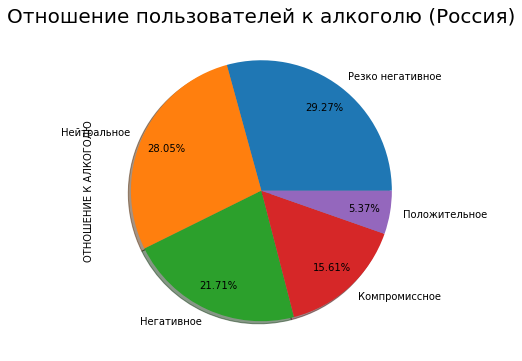

In [41]:
report16 = df_ed[df_ed['СТРАНА']=='Россия']
report16 = report16[report16['ОТНОШЕНИЕ К АЛКОГОЛЮ']!='не указан']['ОТНОШЕНИЕ К АЛКОГОЛЮ'].value_counts()
report16.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Отношение пользователей к алкоголю (Россия)', fontsize=20)
plt.show()

In [42]:
df_ed['ГЛАВНОЕ В ЖИЗНИ'].value_counts()

Семья и дети              450
Саморазвитие              296
Развлечения и отдых       139
Карьера и деньги           99
Совершенствование мира     82
Красота и искусство        41
Слава и влияние            23
Наука и исследования       16
Name: ГЛАВНОЕ В ЖИЗНИ, dtype: int64

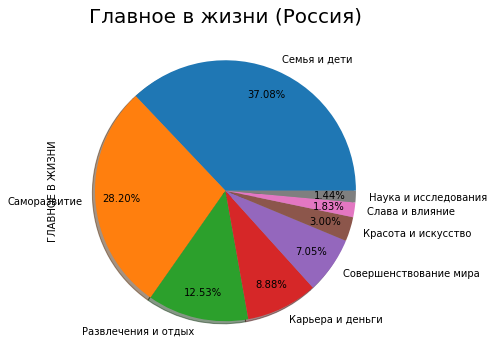

In [43]:
report17 = df_ed[df_ed['СТРАНА']=='Россия']
report17 = report17['ГЛАВНОЕ В ЖИЗНИ'].value_counts()
report17.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Главное в жизни (Россия)', fontsize=20)
plt.show()

In [44]:
df_ed['ГЛАВНОЕ В ЛЮДЯХ'].value_counts()

Доброта и честность    651
Юмор и жизнелюбие      231
Ум и креативность      135
Смелость и упорство    108
Красота и здоровье      59
Власть и богатство      31
Name: ГЛАВНОЕ В ЛЮДЯХ, dtype: int64

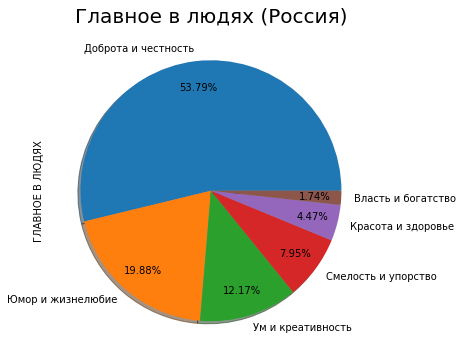

In [45]:
report18 = df_ed[df_ed['СТРАНА']=='Россия']['ГЛАВНОЕ В ЛЮДЯХ'].value_counts()
report18.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Главное в людях (Россия)', fontsize=20)
plt.show()

In [46]:
df_ed['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] = df_ed['ИСТОЧНИКИ ВДОХНОВЕНИЯ'].str.lower()

In [47]:
def impress(row):
    if row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'музика':
        return 'музыка'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'music':
        return 'музыка'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'музыка, видосы, комиксы, стримы':
        return 'музыка'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'литература':
        return 'книги'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'родители':
        return 'семья'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'футбол':
        return 'спорт'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'комп':
        return 'игры'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'мячик и друзья':
        return 'друзья'
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'книги, фильмы, музыка, путешествия, перелеты, поэзия':
        return 'книги'    
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'моя семья и друзья':
        return 'семья'    
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'allj':
        return 'аниме'    
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'дота 2':
        return 'игры'    
    elif row['ИСТОЧНИКИ ВДОХНОВЕНИЯ'] == 'фильмы, игры, книги':
        return 'игры'      
    else:
        return row['ИСТОЧНИКИ ВДОХНОВЕНИЯ']
df_ed['filtered_ИСТОЧНИКИ ВДОХНОВЕНИЯ'] = df_ed.apply(impress, axis = 1)

In [48]:
df_ed['filtered_ИСТОЧНИКИ ВДОХНОВЕНИЯ'].value_counts().head(10)

музыка    58
спорт      9
жизнь      9
люди       7
игры       6
любовь     6
книги      6
семья      6
друзья     5
аниме      3
Name: filtered_ИСТОЧНИКИ ВДОХНОВЕНИЯ, dtype: int64

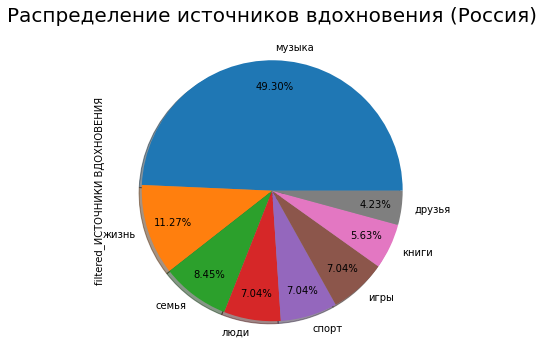

In [49]:
impress2 =  df_ed[df_ed['СТРАНА']=='Россия']['filtered_ИСТОЧНИКИ ВДОХНОВЕНИЯ'].value_counts().head(8)
impress2.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Распределение источников вдохновения (Россия)', fontsize=20)
plt.show()

In [50]:
df_ed['ИГРЫ'] = df_ed['ИГРЫ'].str.lower()

In [51]:
def play(row):
    if row['ИГРЫ'] == 'дота 2':
        return 'dota 2'
    elif row['ИГРЫ'] == 'cs, gta 5🇺🇸':
        return 'cs:go'
    elif row['ИГРЫ'] == 'dota 2 counter strike global offensive':
        return 'dota 2'
    elif row['ИГРЫ'] == 'dota':
        return 'dota 2'
    elif row['ИГРЫ'] == 'dota 2, cs:go':
        return 'cs:go'
    elif row['ИГРЫ'] == 'нету' or row['ИГРЫ'] == 'не играю':
        return 'нет'
    elif row['ИГРЫ'] == 'warframe, lol.':
        return 'warframe'
    elif row['ИГРЫ'] == 'все' or row['ИГРЫ'] == 'много' or row['ИГРЫ'] == 'их много' or row['ИГРЫ'] == 'разные':
        return 'многие'
    elif row['ИГРЫ'] == '...':
        return 'need for speed'
    elif row['ИГРЫ'] == 'баскетбол':
        return 'minecraft'    
    else:
        return row['ИГРЫ']
df_ed['filtered_ИГРЫ'] = df_ed.apply(play, axis = 1)

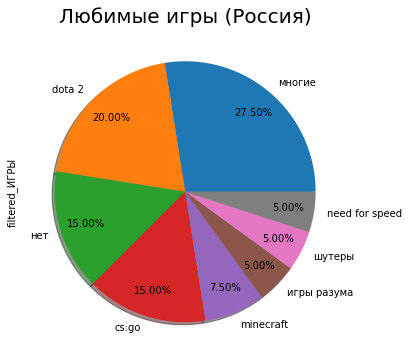

In [52]:
play = df_ed[df_ed['СТРАНА']=='Россия']['filtered_ИГРЫ'].value_counts().head(8)
play.plot(kind='pie', figsize=(12, 6), autopct = '%1.2f%%', shadow=True, pctdistance=0.8)
plt.title('Любимые игры (Россия)', fontsize=20)
plt.show()

<div id='id-section3'/>

## Общий вывод

**Портрет пользователя, интересующегося киберспортом и состоящего 
в киберспортивном  онлайн сообществе**

+ Согласно данным, полученным в ходе проведенного исследования, ядро аудитории киберспортивных сообществ – миллениалы (18-30 лет). 
+ Фанат киберспорта в РФ – это молодой мужчина, студент или только что закончивший университет и начавший работать человек. У него среднее специальное или высшее образование, чаще всего технической направленности. 
+ Он общительный человек с высокой социальной активностью и обширными связями, проживающий в крупных городах-миллионниках (Москва, С-Петербург, Новосибирск, Томск и др.) Не женат.

+ Фанат киберспорта активно пользуется мобильным интернетом, совершает покупки онлайн, часто делает заказы в службе доставки еды. 
+ Это человек, активно поддерживающий бренды, которые инвестируют в киберспорт. Как участник киберспортивного сообщества он хочет использовать ту же технику (компьютеры, клавиатуры, мыши, наушники), что и профессиональные киберспортсмены. 
+ У него достаточно широкий круг интересов помимо киберспорта. Он любит музыку, смотрит  фильмы  и увлекается спортом (посещает спортивный или фитнес клуб). 
+ Негативно или нейтрально относится к курению и алкоголю. В приоритете из жизненных ценностей   у него семья и дети, кроме того, он занимается саморазвитием.
+ В людях ценит доброту, честность, жизнелюбие и хорошо развитое чувство юмора. Всегда готов помочь другому человеку.

**Использованные инструменты и библиотеки**  
Предобработка и анализ данных с помощью программных средств Pyhton